In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_identity = pd.read_csv('Data/train_identity.csv')
train_transaction = pd.read_csv('Data/train_transaction.csv')

In [3]:
print(train_identity.shape)
print(train_transaction.shape)

(144233, 41)
(590540, 394)


In [4]:
pd.set_option('display.max_columns',None)
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
identity_vars = list(train_identity)
transaction_vars = list(train_transaction)
print(identity_vars)
print(transaction_vars)

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',

In [7]:
trans_id = train_transaction['TransactionID']
fraud = train_transaction['isFraud']
x_trans = train_transaction.drop(['TransactionID','isFraud'],axis=1)

Upon a casual inspection, multiple obstacles with this dataset can be identified. 

1. Dimensionality: 
    - There are hundreds of variables
2. Many NaNs
    - Many values are simply missing
3. Not all transactions have corresponding identity information.
    - Identity dataset gives characteristics about the individuals(?)
    - Useful information to have, but can't be paired up with all the transaction data
4. Unlabelled or minimal description of variables
    - The description on kaggle is not very informative
    - This is understandable given the private nature of the data
    - Affects how we would deal with the other three problems
    
    
How can we deal with these issues?
1. Dimensionality
    - Dimensionality Reduction Techniques e.g. Principal Component Analysis, Discriminant Analysis
    - Feature Selection e.g. Lasso
2. NaNs
    - No standard way to deal with it
    - Can potentially work only with rows with complete information
    - Drop variables which are predominately NaN
    - Replace with Mean/Median/Mode
    - Solution depends on what the variables are, difficult in this case because we don't know most of them
3. Not all transactions have corresponding identity information
    - Work with data that is only with individual characteristics
4. Unlabelled or minimal description of variables
    - While I would be good to understand how the features relate to the target variables, we might have to be content with a 'black box' approach
    
First thing to do is see how our NaNs are distributed across the variables.    


In [8]:
identity_na_count = train_identity.isnull().sum()
identity_na_prop = train_identity.isnull().sum()/train_identity.shape[0]*100
identity_na = pd.concat([identity_na_count, identity_na_prop], axis=1)
identity_na.columns = ['Count','Percentage']
print(identity_na)

                Count  Percentage
TransactionID       0    0.000000
id_01               0    0.000000
id_02            3361    2.330257
id_03           77909   54.016071
id_04           77909   54.016071
id_05            7368    5.108401
id_06            7368    5.108401
id_07          139078   96.425922
id_08          139078   96.425922
id_09           69307   48.052110
id_10           69307   48.052110
id_11            3255    2.256765
id_12               0    0.000000
id_13           16913   11.726165
id_14           64189   44.503685
id_15            3248    2.251912
id_16           14893   10.325654
id_17            4864    3.372321
id_18           99120   68.722137
id_19            4915    3.407681
id_20            4972    3.447200
id_21          139074   96.423149
id_22          139064   96.416215
id_23          139064   96.416215
id_24          139486   96.708798
id_25          139101   96.441868
id_26          139070   96.420375
id_27          139064   96.416215
id_28         

We should also be aware what type of variables we have i.e. strings, floats etc

In [9]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


Looks like a mixture of strings and floats, we'll repeat the same process for the transaction data.

In [10]:
transaction_na_count = train_transaction.isnull().sum()
transaction_na_prop = train_transaction.isnull().sum()/train_transaction.shape[0]*100
transaction_na = pd.concat([transaction_na_count, transaction_na_prop], axis=1)
transaction_na.columns = ['Count','Percentage']
print(transaction_na)

                 Count  Percentage
TransactionID        0    0.000000
isFraud              0    0.000000
TransactionDT        0    0.000000
TransactionAmt       0    0.000000
ProductCD            0    0.000000
card1                0    0.000000
card2             8933    1.512683
card3             1565    0.265012
card4             1577    0.267044
card5             4259    0.721204
card6             1571    0.266028
addr1            65706   11.126427
addr2            65706   11.126427
dist1           352271   59.652352
dist2           552913   93.628374
P_emaildomain    94456   15.994852
R_emaildomain   453249   76.751617
C1                   0    0.000000
C2                   0    0.000000
C3                   0    0.000000
C4                   0    0.000000
C5                   0    0.000000
C6                   0    0.000000
C7                   0    0.000000
C8                   0    0.000000
C9                   0    0.000000
C10                  0    0.000000
C11                 

In [9]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
                   ...   
V310              float64
V311              float64
V312              float64
V313              float64
V314              float64
V315              float64
V316              float64
V317        

We have a mixture of integers, floats and strings. Next we'll do some univariate exploratory data analysis on the identity data.

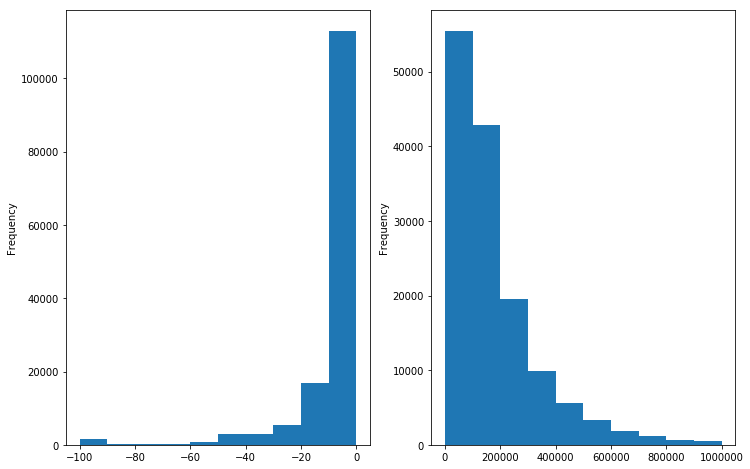

In [27]:
fig, axarr = plt.subplots(1, 2, figsize=(12,8))

train_identity['id_01'].plot.hist(ax=axarr[0])
train_identity['id_02'].plot.hist(ax=axarr[1])

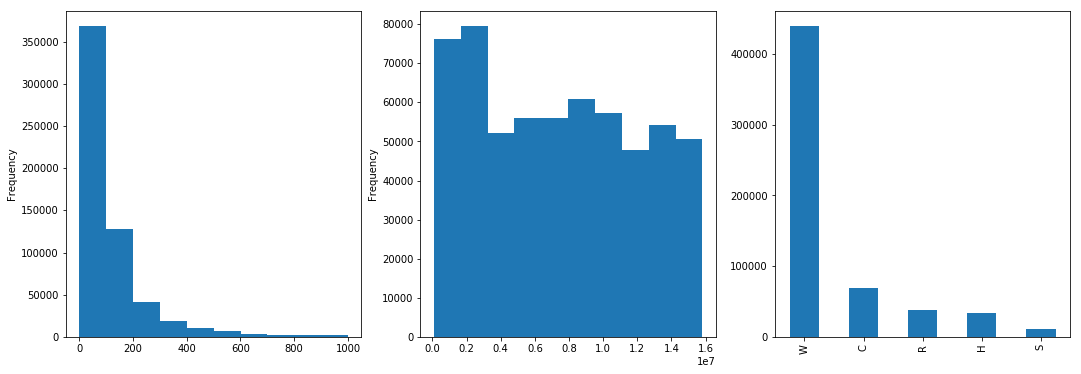

In [40]:
fig, axarr = plt.subplots(1, 3, figsize=(18,6))

train_transaction[train_transaction['TransactionAmt']<1000]['TransactionAmt'].plot.hist(ax=axarr[0])
train_transaction['TransactionDT'].plot.hist(ax=axarr[1])
train_transaction['ProductCD'].value_counts().plot.bar(ax=axarr[2])

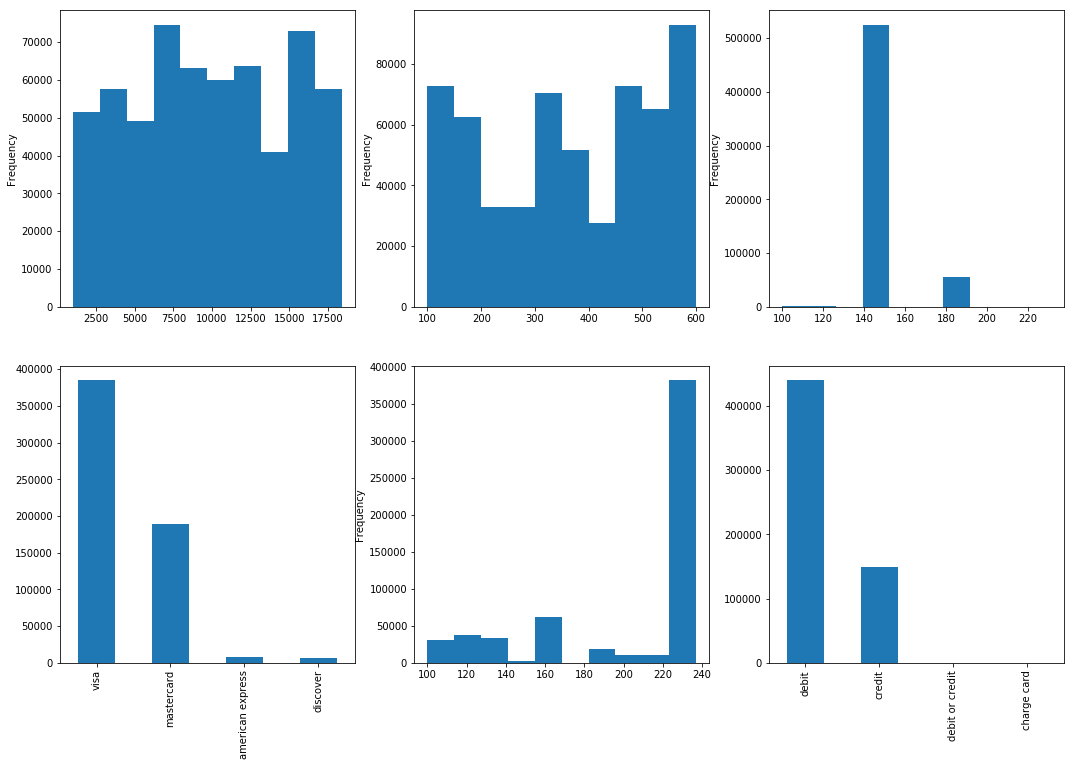

In [53]:
#Card details
fig, axarr = plt.subplots(2, 3, figsize=(18,12))

train_transaction['card1'].plot.hist(ax=axarr[0][0])
train_transaction['card2'].plot.hist(ax=axarr[0][1])
train_transaction['card3'].plot.hist(ax=axarr[0][2])
train_transaction['card4'].value_counts().head(10).plot.bar(ax=axarr[1][0])
train_transaction['card5'].plot.hist(ax=axarr[1][1])
train_transaction['card6'].value_counts().head(10).plot.bar(ax=axarr[1][2])

From the competition hoster: "card1 - card6: payment card information, such as card type, card category, issue bank, country, etc."
- card1 is likely to be the issue bank, approx 18000 unique values cf. https://www.quora.com/How-many-banks-are-there-in-the-world-1
- card3/5 seem to be related to each other and may have something to do with the country of issue
    - card 3 has 114 unique values
    - card 5 has 119 unique values

In [52]:
print(train_transaction['card3'].value_counts())
print(train_transaction['card5'].value_counts())

150.0    521287
185.0     56346
106.0      1571
146.0      1252
144.0      1252
117.0       962
143.0       899
119.0       750
102.0       460
147.0       390
162.0       339
203.0       253
213.0       221
100.0       202
200.0       184
188.0       175
131.0       172
134.0       166
149.0       127
135.0       120
229.0       118
210.0       104
195.0       101
121.0        99
159.0        82
197.0        81
137.0        71
138.0        70
214.0        66
148.0        61
          ...  
205.0         3
225.0         3
202.0         3
207.0         3
174.0         3
181.0         3
179.0         2
206.0         2
208.0         2
193.0         2
220.0         2
186.0         2
226.0         2
176.0         2
224.0         1
173.0         1
201.0         1
170.0         1
125.0         1
132.0         1
199.0         1
172.0         1
209.0         1
101.0         1
175.0         1
228.0         1
139.0         1
114.0         1
164.0         1
221.0         1
Name: card3, Length: 114

In [10]:
strings = train_transaction.select_dtypes(include='object')
numerics = train_transaction.select_dtypes(exclude='object')
dummies = pd.get_dummies(strings)
x_trans = pd.concat([dummies, numerics],axis=1)
x_trans = x_trans.drop(['TransactionID','isFraud'],axis=1)


In [11]:
x_trans.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com,R_emaildomain_aim.com,R_emaildomain_anonymous.com,R_emaildomain_aol.com,R_emaildomain_att.net,R_emaildomain_bellsouth.net,R_emaildomain_cableone.net,R_emaildomain_centurylink.net,R_emaildomain_cfl.rr.com,R_emaildomain_charter.net,R_emaildomain_comcast.net,R_emaildomain_cox.net,R_emaildomain_earthlink.net,R_emaildomain_embarqmail.com,R_emaildomain_frontier.com,R_emaildomain_frontiernet.net,R_emaildomain_gmail,R_emaildomain_gmail.com,R_emaildomain_gmx.de,R_emaildomain_hotmail.co.uk,R_emaildomain_hotmail.com,R_emaildomain_hotmail.de,R_emaildomain_hotmail.es,R_emaildomain_hotmail.fr,R_emaildomain_icloud.com,R_emaildomain_juno.com,R_emaildomain_live.com,R_emaildomain_live.com.mx,R_emaildomain_live.fr,R_emaildomain_mac.com,R_emaildomain_mail.com,R_emaildomain_me.com,R_emaildomain_msn.com,R_emaildomain_netzero.com,R_emaildomain_netzero.net,R_emaildomain_optonline.net,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_prodigy.net.mx,R_emaildomain_protonmail.com,R_emaildomain_ptd.net,R_emaildomain_q.com,R_emaildomain_roadrunner.com,R_emaildomain_rocketmail.com,R_emaildomain_sbcglobal.net,R_emaildomain_sc.rr.com,R_emaildomain_scranton.edu,R_emaildomain_servicios-ta.com,R_emaildomain_suddenlink.net,R_emaildomain_twc.com,R_emaildomain_verizon.net,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,

In [12]:
transaction_na_count = x_trans.isnull().sum()
transaction_na_prop = x_trans.isnull().sum()/x_trans.shape[0]*100
transaction_na = pd.concat([transaction_na_count, transaction_na_prop], axis=1)
transaction_na.columns = ['Count','Percentage']
print(transaction_na)

                                Count  Percentage
ProductCD_C                         0    0.000000
ProductCD_H                         0    0.000000
ProductCD_R                         0    0.000000
ProductCD_S                         0    0.000000
ProductCD_W                         0    0.000000
card4_american express              0    0.000000
card4_discover                      0    0.000000
card4_mastercard                    0    0.000000
card4_visa                          0    0.000000
card6_charge card                   0    0.000000
card6_credit                        0    0.000000
card6_debit                         0    0.000000
card6_debit or credit               0    0.000000
P_emaildomain_aim.com               0    0.000000
P_emaildomain_anonymous.com         0    0.000000
P_emaildomain_aol.com               0    0.000000
P_emaildomain_att.net               0    0.000000
P_emaildomain_bellsouth.net         0    0.000000
P_emaildomain_cableone.net          0    0.000000


Many of the variables have a high proportion of missing data (>50%) which will mess with any of our machine learning models, so we're going to fill the nas with the mean value. (We will also experiment with filling it with zeros, and for categorical variables creating a separate dummy, or filling with the most common value)

In [13]:
x_trans = x_trans.fillna(x_trans.mean())

In [14]:
corrs = x_trans.corrwith(fraud)
print(abs(corrs).sort_values(ascending=False))

V257                            0.262946
V246                            0.251838
V244                            0.249951
V242                            0.247522
V45                             0.236688
V201                            0.234520
V200                            0.227926
V86                             0.224530
V87                             0.224450
V189                            0.220374
V44                             0.218669
V188                            0.217058
V258                            0.203975
V52                             0.201111
V51                             0.187440
V228                            0.184556
V170                            0.178601
V40                             0.178413
V79                             0.173097
V39                             0.170565
V94                             0.167984
V38                             0.167128
V43                             0.166514
V33                             0.165534
V199            

Since there's literally hundreds of variables, we'll try some dimension reduction (PCA) and see how they correlate with the dependent variable

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
x_components = pca.fit_transform(x_trans)
x_components = pd.DataFrame(data=x_components, columns=['PC1','PC2','PC3','PC4','PC5'])

In [18]:

x_components.head()

,PC1,PC2,PC3,PC4,PC5
0,-7.285906e+06,-8614.109434,1214.333797,-4090.730880,-217.426114
1,-7.285905e+06,-8618.423120,871.942767,7075.733008,-255.498278
2,-7.285837e+06,-8617.418693,908.453393,5168.245582,-262.408958
3,-7.285807e+06,-8632.266138,3626.582226,-8259.347442,1073.567132
4,-7.285946e+06,114177.098244,278.438306,5374.297539,705.847243


In [20]:
pca_corrs = x_components.corrwith(fraud)
print(pca_corrs)

PC1    0.013103
PC2   -0.024867
PC3   -0.007516
PC4    0.013149
PC5    0.032588
dtype: float64


Correlations don't look very good! Perhaps we need a different approach....